# Data Cleaning File

## Imports

In [170]:
# import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.svm import SVC
# import re
# import spotipy
# from spotipy.oauth2 import SpotifyClientCredentials
# import spotifyusercredentials

# # Spotify API Authentication (with separate user credentials)
# client_credentials_manager = SpotifyClientCredentials(client_id=spotifyusercredentials.client_ID, client_secret=spotifyusercredentials.client_SECRET)
# sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

## Importing and Cleaning Data

In [171]:
# Step 1: Load and preprocess the dataset
# Assuming you have a dataset with features extracted and emotion labels
df = pd.read_csv('../data/f1combfinal2.csv')  # Replace 'music_dataset.csv' with your dataset file

In [172]:
df.head()

,f_name,a_name,title,lyrics,spot_id,sr_json,tempo,energy,danceability,loudness,valence,acousticness,tr_json,mood
0,angry_all/50 Ft Queenie.mp3,PJ Harvey,50 Ft Queenie,Hey I'm one big queen No one can stop me Red ...,3fJprjhRxTVtOp18EHdNfu,"{\n ""tracks"": {\n ""href"": ""https://api.spotif...",126.366,0.667,0.382,-16.077,0.718,0.000652,"{\n ""acousticness"": 0.000652,\n ""analysis_url""...",1
1,angry_all/A Bad Dream.mp3,Keane,A Bad Dream,Why do I have to fly over every town up and do...,17ScnUBsr3CgfJGd7k0kAZ,"{\n ""tracks"": {\n ""href"": ""https://api.spotif...",145.035,0.760,0.405,-4.852,0.316,0.008240,"{\n ""acousticness"": 0.00824,\n ""analysis_url"":...",1
2,angry_all/Agenda Suicide (Jagz Kooner Remix).mp3,The Faint,Agenda Suicide,You could follow logic Or contest it all The w...,4Mhj9IjSxTOOWGCS5MbBG4,"{\n ""tracks"": {\n ""href"": ""https://api.spotif...",144.585,0.703,0.574,-7.789,0.275,0.006580,"{\n ""acousticness"": 0.00658,\n ""analysis_url"":...",1
3,angry_all/Alternative Ulster.mp3,Stiff Little Fingers,Alternative Ulster,There's nothin' for us in Belfast The Pound's ...,0MDJjySh4ydA8CyFVkcFQh,"{\n ""tracks"": {\n ""href"": ""https://api.spotif...",118.181,0.925,0.600,-9.148,0.382,0.008820,"{\n ""acousticness"": 0.00882,\n ""analysis_url"":...",1
4,angry_all/Animal Instinct.mp3,The Cranberries,Animal Instinct,Suddenly something has happened to me As I was...,3J58Ccc5iTbCRnYx2xjo6d,"{\n ""tracks"": {\n ""href"": ""https://api.spotif...",132.145,0.823,0.622,-5.381,0.605,0.094600,"{\n ""acousticness"": 0.0946,\n ""analysis_url"": ...",1


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776 entries, 0 to 1775
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   f_name        1776 non-null   object 
 1   a_name        1776 non-null   object 
 2   title         1776 non-null   object 
 3   lyrics        1776 non-null   object 
 4   spot_id       1776 non-null   object 
 5   sr_json       1776 non-null   object 
 6   tempo         1776 non-null   float64
 7   energy        1776 non-null   float64
 8   danceability  1776 non-null   float64
 9   loudness      1776 non-null   float64
 10  valence       1776 non-null   float64
 11  acousticness  1776 non-null   float64
 12  tr_json       1776 non-null   object 
 13  mood          1776 non-null   int64  
dtypes: float64(6), int64(1), object(7)
memory usage: 194.4+ KB


In [174]:
mood_codes={0:'Happy',
1:'Angry',
2:'Sad',
3:'Relaxed'
}

In [175]:
mood_list = ['Happy', 'Angry', 'Sad', 'Relaxed']

## Train-Test Split

In [176]:
# Preparing columns to drop out of X
columns_to_drop=df.columns[0:6].tolist()
columns_to_drop.append(df.columns[-2])
columns_to_drop.append(df.columns[-1])

In [177]:
# Step 2: Split the dataset into training and testing sets
X = df.drop(columns_to_drop, axis=1)  # Features
y = df['mood']  # Emotion labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
X

,tempo,energy,danceability,loudness,valence,acousticness
0,126.366,0.667,0.382,-16.077,0.718,0.000652
1,145.035,0.760,0.405,-4.852,0.316,0.008240
2,144.585,0.703,0.574,-7.789,0.275,0.006580
3,118.181,0.925,0.600,-9.148,0.382,0.008820
4,132.145,0.823,0.622,-5.381,0.605,0.094600
...,...,...,...,...,...,...
1771,136.924,0.286,0.434,-10.803,0.122,0.533000
1772,137.928,0.605,0.536,-6.231,0.156,0.129000
1773,122.979,0.137,0.424,-15.580,0.288,0.909000
1774,190.714,0.285,0.326,-9.377,0.455,0.841000


In [179]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1771    3
1772    3
1773    3
1774    3
1775    3
Name: mood, Length: 1776, dtype: int64

## Comparing Models

### The Logistic Regression Model

In [180]:
# Step 3: Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train);

c:\Users\James\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.46348314606741575
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.53      0.49        83
           1       0.50      0.63      0.56       101
           2       0.44      0.57      0.50        76
           3       0.41      0.15      0.22        96

    accuracy                           0.46       356
   macro avg       0.45      0.47      0.44       356
weighted avg       0.45      0.46      0.44       356



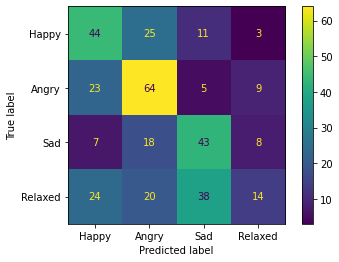

In [181]:
# Step 4: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')
cm_disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=mood_list)
cm_disp.plot()
plt.show()


### The Decision Tree Model

In [182]:
# Step 3: Train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy: 0.8455056179775281
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        83
           1       0.82      0.80      0.81       101
           2       0.84      0.87      0.85        76
           3       0.91      0.89      0.90        96

    accuracy                           0.85       356
   macro avg       0.84      0.85      0.85       356
weighted avg       0.85      0.85      0.85       356



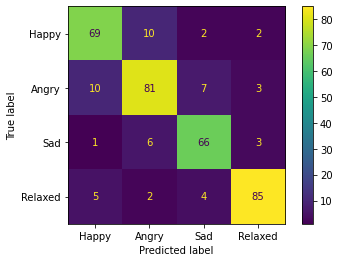

In [183]:
# Step 4: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

cm_disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=mood_list)
cm_disp.plot()
plt.show()

### Discussion: Evaluating the two models
